In [20]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.58M/6.58M [00:00<00:00, 40.6MB/s]


In [4]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
mars_temps = pd.read_html(url)

In [5]:
# Display the data that is currently a list. NOTE: temperatures listed in Celsius 
mars_temps

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [6]:
# Convert the HTML list into a Dataframe
mars_temps_df = mars_temps[0]

In [7]:
# Validate that the list has been converted to a dataframe
mars_temps_df.sample(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
545,569,2014-05-10,625,128,5,-81.0,761.0
222,162,2013-05-09,269,315,11,-72.0,866.0
0,2,2012-08-16,10,155,6,-75.0,739.0
1754,1783,2017-11-04,1865,82,3,-80.0,852.0
503,526,2014-03-28,583,108,4,-82.0,806.0
1311,1337,2016-08-01,1417,195,7,-70.0,791.0
1468,1495,2017-01-09,1574,295,10,-72.0,868.0
1617,1647,2017-06-15,1727,19,1,-75.0,855.0
1197,1223,2016-03-27,1294,128,5,-79.0,758.0
29,185,2012-09-19,43,173,6,-74.0,756.0


In [8]:
# Display the current datatypes for each column
mars_temps_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [9]:
# Convert data type for column "Terrestrial_date" to datetime
mars_temps_df['terrestrial_date'] = pd.to_datetime(mars_temps_df['terrestrial_date'])

In [10]:
# Validate the datatype changed for the specified column
mars_temps_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [11]:
# Close the browser created in this script, the data is now stored as a DataFrame
browser.quit()

In [12]:
# Deliverable 2: Scrape and Analyze Mars Weather Data 
# Question 6: How many months exist on Mars?
num_mars_mths = mars_temps_df['month'].nunique()
print(f'There are', num_mars_mths, 'month''s in a Martian solar year')

There are 12 months in a Martian solar year


In [13]:
# Deliverable 2: Scrape and Analyze Mars Weather Data 
# Question 7: How many Martian (and not Earth) days worth of data exist in the scraped dataset
num_mars_days = mars_temps_df['sol'].nunique()
print(f'There are', num_mars_days,'unique days in this dataset')

There are 1867 unique days in this dataset


<BarContainer object of 12 artists>

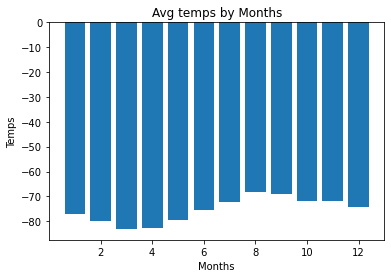

In [108]:
# Deliverable 2: Scrape and Analyze Mars Weather Data 
# Question 8: What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# Plot the results as a bar chart.
# What is the coldest month

# What is the warmest month
# mars_month_coldest = mars_month_temps['min_temp'].groupby(mars_month_temps['month']).mean()
mars_month_coldest = mars_temps_df.groupby('month').mean('min_temp')

# Create Range for months using Index, this converts the "group by" into a series which can be plotted
x_axis_months = pd.Series(range(1,mars_month_coldest['id'].count() + 1))

# Create labels for the x and y axis
plt.xlabel("Months")
plt.ylabel("Temps")
# Create Title
plt.title("Avg temps by Months")
# Display the completed Bar chart
plt.bar(x_axis_months, mars_month_coldest['min_temp'])

In [63]:
mars_month_hotest = mars_month_temps['min_temp'].max()
mars_month_hotest

-68.38297872340425

<BarContainer object of 12 artists>

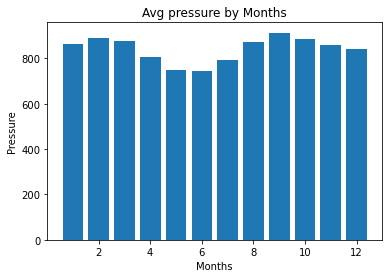

In [107]:
# Deliverable 2: Scrape and Analyze Mars Weather Data 
# Question 9: Which months have the lowest and the highest atmospheric pressure on Mars?
# Plot the results as a bar chart.

# Returns a DF
mars_avg_pressure = mars_temps_df.groupby('month').mean('pressure')

# Create Range for months using Index, this converts the "group by" into a series which can be plotted
x_axis_months = pd.Series(range(1,mars_avg_pressure['id'].count() + 1))

# Create labels for the x and y axis
plt.xlabel("Months")
plt.ylabel("Pressure")

# Create Title for chart
plt.title("Avg pressure by Months")

# Display completed bar chart
plt.bar(x_axis_months, mars_avg_pressure['pressure'])

In [109]:
# Deliverable 2: Scrape and Analyze Mars Weather Data 
# Question 10: About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles 
# the Sun once, how many days elapse on Earth?
# mars_temps_df.sample(10)
# mars_temps_df['terrestrial_date']
#getYears = pd.to_datetime(mars_temps_df['terrestrial_date']).dt.to_period('Y').nunique()
#getYears
get_days_year = pd.to_datetime(mars_temps_df['terrestrial_date']).dt.to_period('Y').nunique()
get_days_year
find_year_counts = mars_temps_df['terrestrial_date']).dt.to_period('Y') == get_days_year.count()

# Visually estimate the result by plotting the daily minimum temperature.

# df['month_year'] = pd.to_datetime(df['birth_date']).dt.to_period('M')
# df.head()

SyntaxError: invalid syntax (2295476759.py, line 10)